In [21]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
titanic_df = pd.read_csv('titanic_data.csv')

#importing titanic_data to dataframe.


In [22]:

# I am interested in finding out what is the likelyhood of a person onboard titanic surviving , on account of his/her : 

# 1. PClass (1d and 2D)
# 2. Gender (1d and 2D)
# 3. Age    (1d and 2D)

# i.e If they are more likely to survive due to any of the factors.


In [23]:
#Cleaning

#First I am changing the column names to match the description at the kaggle site.

titanic_df.columns = ['PassengerID','Survival','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

titanic_df = titanic_df[titanic_df['Age'].isnull() == False]
titanic_df = titanic_df[titanic_df['Embarked'].isnull() == False]#Removing all rows with embarked column empty

#I'm following the convention :
#groupby_xxx = variable for groupby object
#plot_xxx = plot variable for the type xxx

In [24]:
def returnMeanByGroup(Attribute):
    return titanic_df.groupby(Attribute)['Survival'].mean()
#Group by function for attribute 'Attribute - Used for 1D analysis.

def set_sex_values(column_data):
    if column_data == 'male':
        return 1
    else:
        return 2

titanic_df['gender'] = titanic_df['Sex'].apply(set_sex_values) #Same thing as Map.

# This quantifies Gender as Male = 1 or Female = 2 , because it is difficult to quantifiably find a correlation between a string
# and boolean (Survival) - (categorical vs categorical)


In [25]:
#Here I find out what is the likelyhood that a person aboard (irrespective of their gender,age etc are likely to survive)
series_total_count = titanic_df.groupby('Survival',as_index = False).size()

count_survived = series_total_count.iloc[1]

count_total = series_total_count.iloc[0] + count_survived
print('Likelyhood of Survival :',(count_survived/float(count_total)))

('Likelyhood of Survival :', 0.4044943820224719)


('Correlation quotient between Pclass and Survival', -0.35646158844523856)


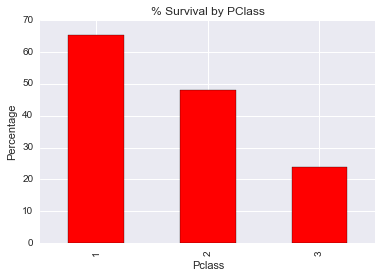

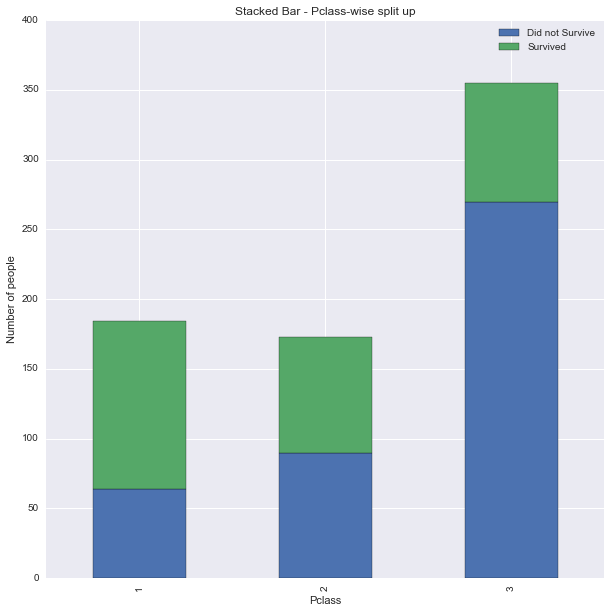

In [46]:
# By Class.

#Check likelyhood of survival by Socio-Economic status
# titanic_df[titanic_df['Pclass'].isnull()] = There is no row without a valid SES.

print('Correlation quotient between Pclass and Survival',titanic_df['Pclass'].corr(titanic_df['Survival']))
#As Pclass increases - chances of survival decreases - Negative pearson's correlation

#From the correlation value , we can conclude higher SES passengers were given preference during evacuation. 



groupby_pclass = returnMeanByGroup('Pclass')
groupby_class_percent = groupby_pclass * 100
%matplotlib inline
plot_pclass_ratio = groupby_class_percent.plot(kind='bar',title = "% Survival by PClass",color = 'r')
plot_pclass_ratio.set_ylabel("Percentage")





pclass_size_each_bin_survived = titanic_df.groupby(['Pclass','Survival'],as_index = False).size()
plot_pclass_survival = pclass_size_each_bin_survived.unstack().plot(kind='bar',stacked = True,figsize = (10,10),title = "Stacked Bar - Pclass-wise split up")
plot_pclass_survival.set_ylabel("Number of people")
plot_pclass_survival.legend(["Did not Survive","Survived"],loc = 'best')
plt.show()

#Out of all the people in 
#Pclass 1 - 64% survived
#PClass 2 - 48% survived
#Pclass 3 - 24% survived

#The differnce between Pclass 1 & 2 is not very much , however it is very large for pclas3. But we can't say the reason behind it 
#is SES affirmatively now.




('Correlation quotient between gender and Survival', 0.53676162334850352)


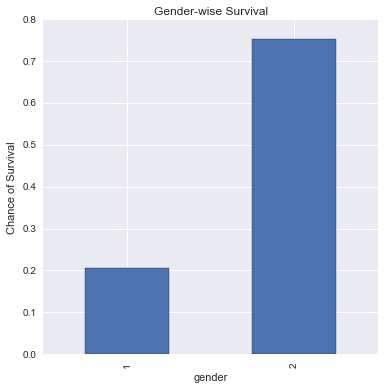

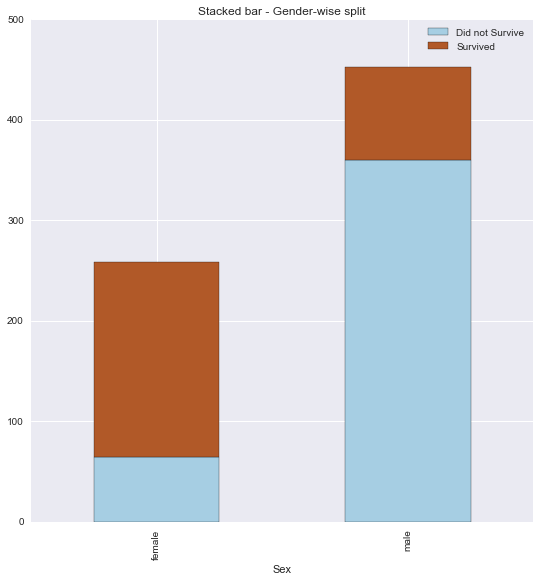

In [97]:
#By Gender

print('Correlation quotient between gender and Survival',titanic_df['gender'].corr(titanic_df['Survival']))
#Value of +0.538 indicate a positive correlation. As Gender value increases(inclining towards Female ) , Chance of Survival
#increases.

groupby_gender = returnMeanByGroup('gender')
#groupby_gender.sort(inplace = True)
plot_gender_ratio = groupby_gender.plot(kind='bar',figsize = (6,6),title = 'Gender-wise Survival')
plot_gender_ratio.set_ylabel("Chance of Survival")
plt.show()

pgender_size_each_bin_survived = titanic_df.groupby(['Sex','Survival'],as_index = False).size().unstack()
plot_pgender_survival = pgender_size_each_bin_survived.plot(kind = 'bar',stacked =True , colormap = 'Paired',figsize = (9,9),title = 'Stacked bar - Gender-wise split')
plot_pgender_survival.legend(['Did not Survive','Survived'],loc ='best')




('Correlation quotient between Age and Survival', -0.082445868043413917)


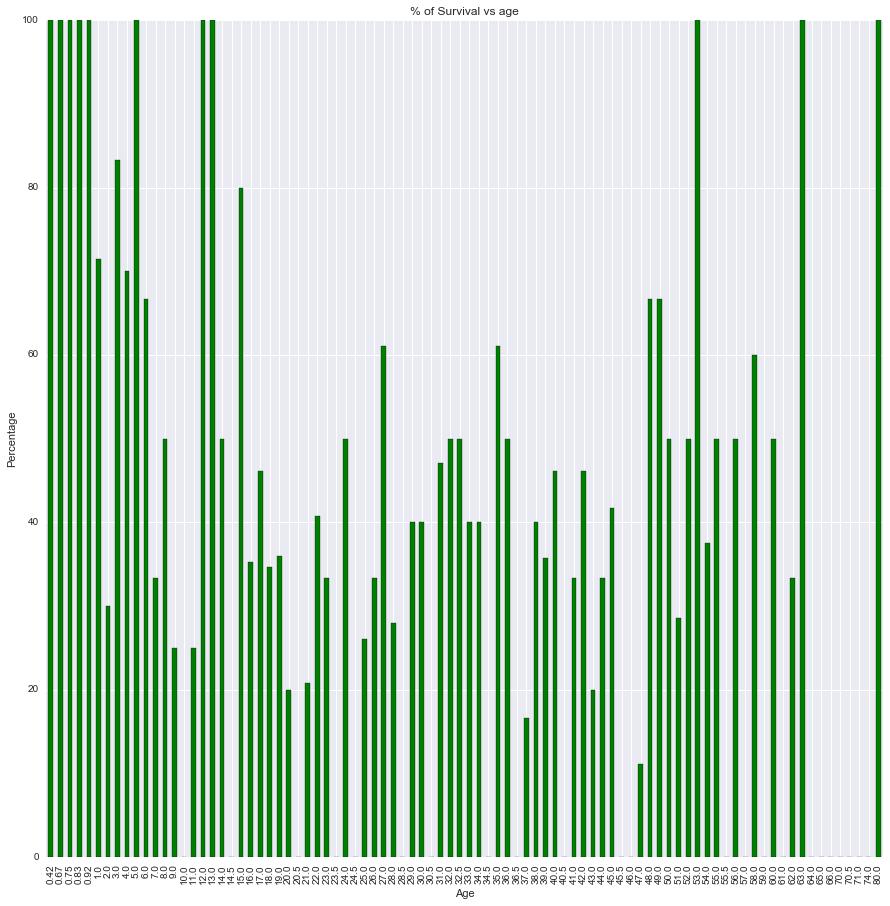

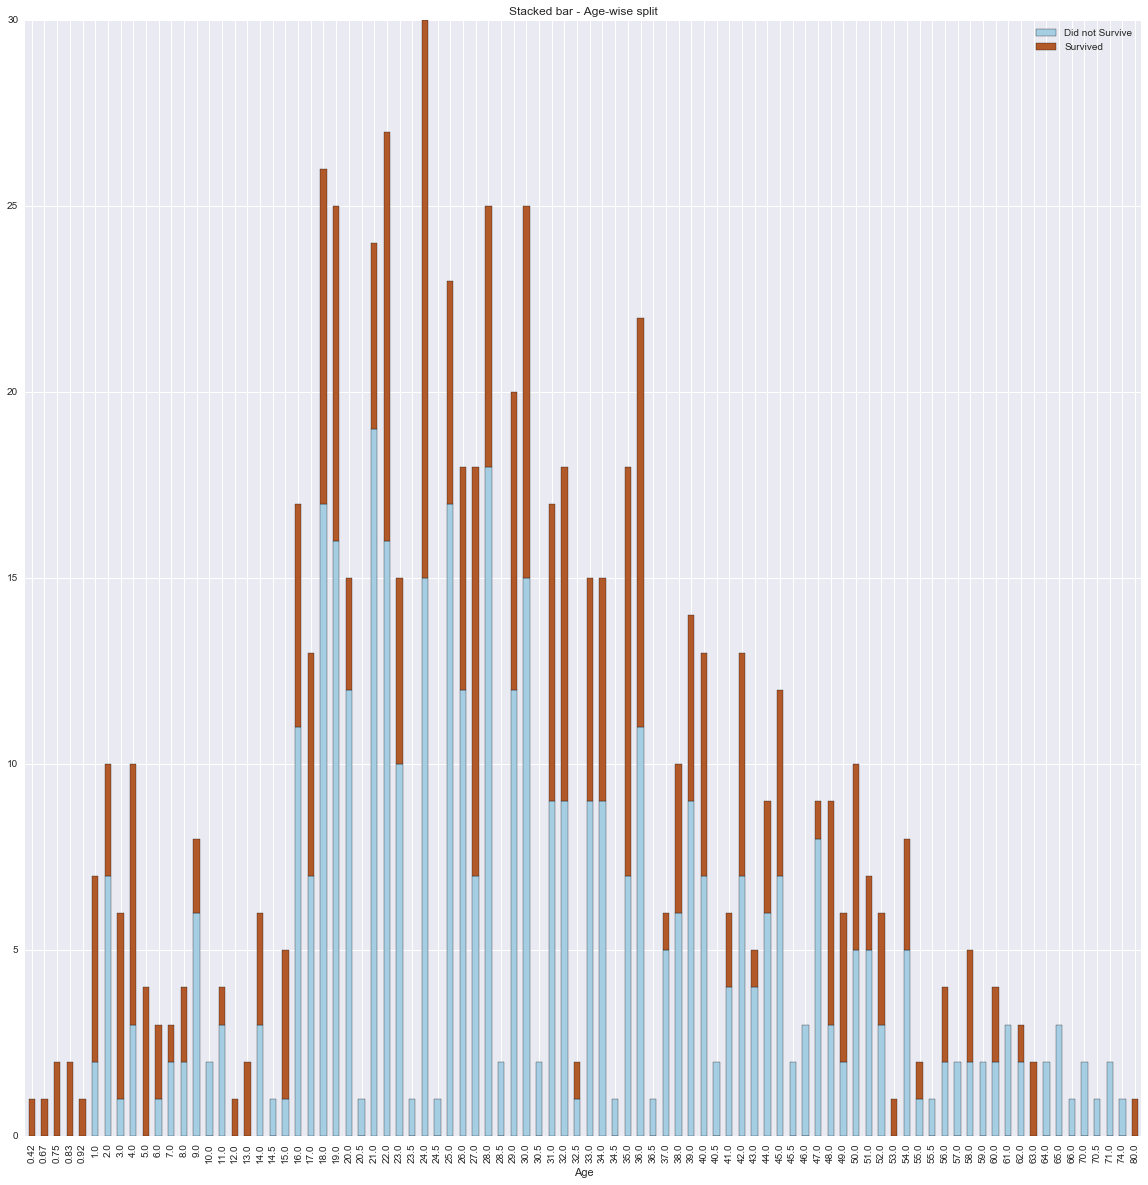

In [96]:
print('Correlation quotient between Age and Survival',titanic_df['Age'].corr(titanic_df['Survival']))
#Negative correlation indicates younger age groups are more likely to survive. However the correlation is not really strong.


groupby_age = returnMeanByGroup('Age')
groupby_age = groupby_age * 100
plot_age_ratio = groupby_age.plot.bar(color = 'g',title = '% of Survival vs age',figsize =(15,15))
plot_age_ratio.set_ylabel('Percentage')
plt.show()

page_size_each_bin_survived = titanic_df.groupby(['Age','Survival'],as_index = False).size().unstack()

plot_page_survival = page_size_each_bin_survived.plot(kind = 'bar',stacked =True , colormap = 'Paired',figsize = (20,20),title = 'Stacked bar - Age-wise split')
plot_page_survival.legend(['Did not Survive','Survived'],loc ='best')


